# Predicción de Prevalencia de Diabetes


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar datos
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
df = pd.read_csv(url)

# Vista previa
df.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [3]:
# Información general
print(df.shape)
print(df.info())
print(df.columns)


(3140, 108)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB
None
Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)


In [4]:
# Nulos
df.isnull().sum().sort_values(ascending=False).head(20)


fips                        0
TOT_POP                     0
0-9                         0
0-9 y/o % of total pop      0
19-Oct                      0
10-19 y/o % of total pop    0
20-29                       0
20-29 y/o % of total pop    0
30-39                       0
30-39 y/o % of total pop    0
40-49                       0
40-49 y/o % of total pop    0
50-59                       0
50-59 y/o % of total pop    0
60-69                       0
60-69 y/o % of total pop    0
70-79                       0
70-79 y/o % of total pop    0
80+                         0
80+ y/o % of total pop      0
dtype: int64

In [5]:
# Eliminamos nulos
df = df.dropna()


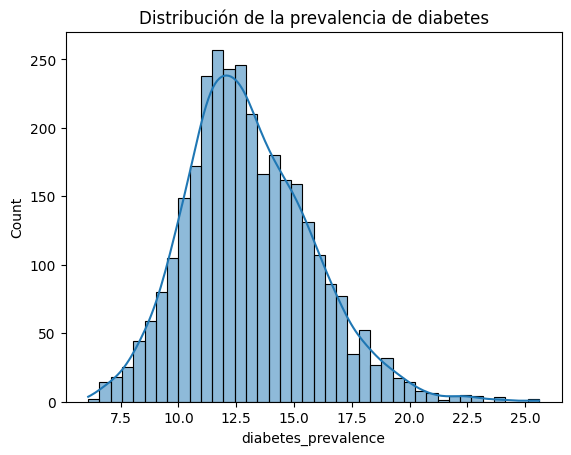

In [6]:
# Distribución de la variable objetivo
sns.histplot(df['diabetes_prevalence'], kde=True)
plt.title("Distribución de la prevalencia de diabetes")
plt.show()


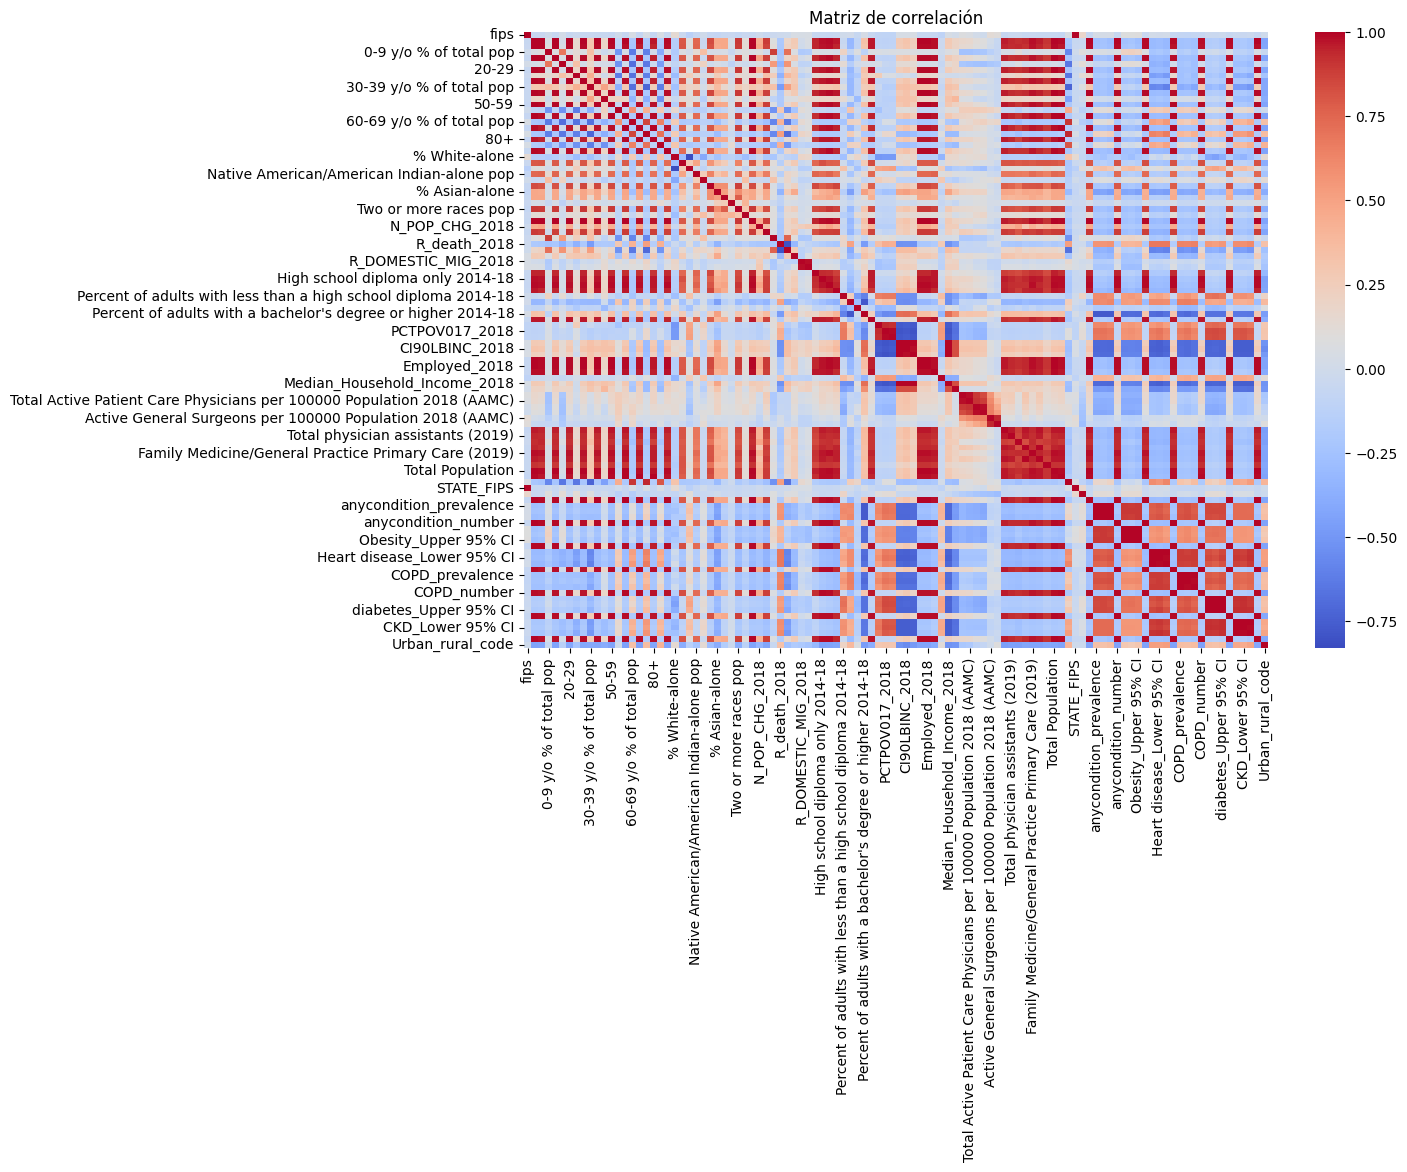

In [7]:
# Matriz de correlación (opcionalmente solo numéricas)
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Separar variables predictoras y objetivo
X = df.drop("diabetes_prevalence", axis=1).select_dtypes(include=np.number)
y = df["diabetes_prevalence"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

print("Ridge Regression")
print("R² Score:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))


Ridge Regression
R² Score: 0.9997543272450424
RMSE: 0.04384326709419987


In [10]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("Lasso Regression")
print("R² Score:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Lasso Regression
R² Score: 0.8601705710537424
RMSE: 1.045980777265538
